In [6]:
#Extract files from ZIP folder
import zipfile
with zipfile.ZipFile("archive (1).zip", 'r') as zip_ref:
    zip_ref.extractall()

In [8]:
#Load Packages
import sys
import sklearn
import os
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from functools import partial
import PIL
import PIL.Image

import tensorflow as tf
from tensorflow import keras

np.random.seed(42) # note that you must use the same seed to ensure consistentcy in your training/validation/testing
tf.random.set_seed(42)

2022-10-28 23:33:11.063132: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-28 23:33:11.716302: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [9]:
from keras.utils import np_utils

from keras.preprocessing import image
from tqdm import tqdm # progress bar


In [12]:
#check directory you are working on
import os
cwd = os.getcwd()
cwd

'/sfs/qumulo/qhome/akp4he/ds6050'

In [14]:
#for data_dir use directory (from  above) of where files were unzipped
data_dir = "/sfs/qumulo/qhome/akp4he/ds6050/House_Room_Dataset"

batch_size = 32;
# IMPORTANT: Depends on what pre-trained model you choose, you will need to change these dimensions accordingly
img_height = 150; 
img_width = 150;

# Training Dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split = 0.2,
    subset = "training",
    seed = 42,
    image_size= (img_height, img_width),
    batch_size = batch_size
)

# Validation Dataset
validation_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split = 0.2,
    subset = "validation",
    seed = 42,
    image_size = (img_height, img_width),
    batch_size = batch_size
)        

Found 5250 files belonging to 5 classes.
Using 4200 files for training.
Found 5250 files belonging to 5 classes.
Using 1050 files for validation.


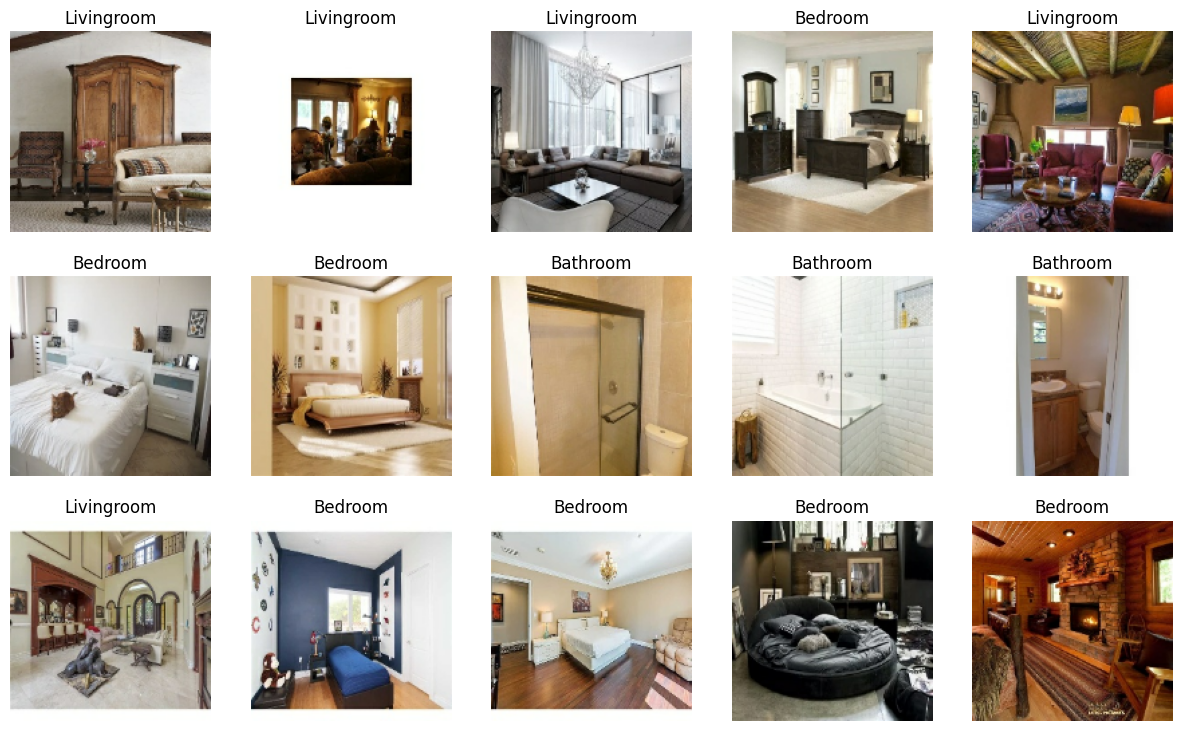

In [18]:
# Visualize some of the train samples of one batch
# Make sure you create the class names that match the order of their appearances in the "files" variable
class_names = ['Bathroom','Bedroom','Dining','Kitchen','Livingroom']

# Rows and columns are set to fit one training batch (32)
n_rows = 3
n_cols = 5
plt.figure(figsize=(n_cols * 3, n_rows * 3))
for images, labels in train_ds.take(1):
    for i in range (n_rows*n_cols):
        plt.subplot(n_rows, n_cols, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.axis('off')
        plt.title(class_names[labels[i]], fontsize=12)
plt.subplots_adjust(wspace=.2, hspace=.2)


Efficient Net B0, average pooling, batch normalization, hidden layer with 400 nodes and Relu activation, and Adam optimizer

In [19]:
base_model=keras.applications.efficientnet.EfficientNetB0(include_top=False, weights="imagenet")
avg=keras.layers.GlobalAvgPool2D()(base_model.output)
norm=keras.layers.BatchNormalization()(avg)
relu=keras.layers.Dense(400,activation="relu")(norm)
norm2=keras.layers.BatchNormalization()(relu)
output=keras.layers.Dense(18,activation="softmax")(norm2)
model=keras.Model(inputs=base_model.input,outputs=output)

for layer in base_model.layers:
  layer.trainable=False

optimizer=tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss="sparse_categorical_crossentropy",optimizer=optimizer,
              metrics=["accuracy"])
history = model.fit(train_ds, epochs=10,batch_size=batch_size,validation_data=validation_ds)

16705208/16705208 [==============================] - 0s 0us/step
Epoch 1/10
132/132 [==============================] - 44s 287ms/step - loss: 1.0285 - accuracy: 0.7393 - val_loss: 0.6667 - val_accuracy: 0.7895
Epoch 2/10
132/132 [==============================] - 37s 279ms/step - loss: 0.3833 - accuracy: 0.8714 - val_loss: 0.5708 - val_accuracy: 0.8171
Epoch 3/10
132/132 [==============================] - 37s 279ms/step - loss: 0.2786 - accuracy: 0.9064 - val_loss: 0.5902 - val_accuracy: 0.8095
Epoch 4/10
132/132 [==============================] - 37s 281ms/step - loss: 0.1940 - accuracy: 0.9376 - val_loss: 0.6420 - val_accuracy: 0.8095
Epoch 5/10
132/132 [==============================] - 37s 278ms/step - loss: 0.1597 - accuracy: 0.9479 - val_loss: 0.7143 - val_accuracy: 0.7990
Epoch 6/10
132/132 [==============================] - 37s 280ms/step - loss: 0.1340 - accuracy: 0.9593 - val_loss: 0.7327 - val_accuracy: 0.7933
Epoch 7/10
132/132 [==============================] - 37s 277ms/s

In [20]:
model.evaluate(validation_ds)

33/33 [==============================] - 7s 217ms/step - loss: 0.7515 - accuracy: 0.8019


[0.751518189907074, 0.8019047379493713]